In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [2]:
cols = ["#52952c",
"#80d358",
"#328dee",
"#d7a532",
"#d5702e",
"#b166d0"]
cols_here = [cols[2], cols[3]]

In [3]:
files = glob.glob('K/*')
files

['K/mnist_dnn_s2_r_apgd_63.csv',
 'K/cifar10_resnet_s2_r_apgd_31.csv',
 'K/cifar10_resnet_s3_r_apgd_31.csv',
 'K/mnist_dnn_s3_r_apgd_63.csv']

In [4]:
df_mnist_2 = pd.read_csv(files[0])
df_mnist_3 = pd.read_csv(files[3])
df_cifar_2 = pd.read_csv(files[1])
df_cifar_3 = pd.read_csv(files[2])

In [5]:
df_mnist_2['Dataset'] = df_mnist_3['Dataset'] = 'MNIST'
df_cifar_2['Dataset'] = df_cifar_3['Dataset'] = 'CIFAR-10'
df_mnist_2['Stage'] = df_cifar_2['Stage'] = 'Stage 2'
df_mnist_3['Stage'] = df_cifar_3['Stage'] = 'Stage 3'
res2 = pd.concat([df_mnist_2, df_cifar_2])
res3 = pd.concat([df_mnist_3, df_cifar_3])

In [25]:
res2

,k,acc,fpr,Dataset,Stage
0,2,0.810,0.006,MNIST,Stage 2
1,4,0.814,0.014,MNIST,Stage 2
2,6,0.816,0.018,MNIST,Stage 2
3,8,0.818,0.020,MNIST,Stage 2
4,10,0.818,0.020,MNIST,Stage 2
5,12,0.818,0.022,MNIST,Stage 2
6,14,0.818,0.022,MNIST,Stage 2
7,16,0.820,0.026,MNIST,Stage 2
8,18,0.824,0.030,MNIST,Stage 2
9,20,0.832,0.034,MNIST,Stage 2


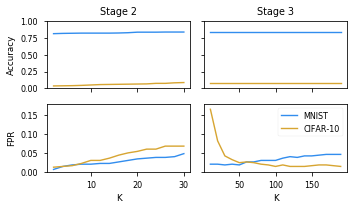

In [6]:
plt.style.use('seaborn-paper')
f, ax = plt.subplots(2,2, figsize=(5,3))

s1 = sns.lineplot(x='k', y='acc', hue="Dataset", data=res2, ax=ax[0,0], palette=cols_here)
s1.set(xlabel=None, xticklabels=[], ylabel='Accuracy')
s1.legend_.remove()
ax[0,0].set(ylim=(0, 1))

s2 = sns.lineplot(x='k', y='fpr', hue="Dataset", data=res2, ax=ax[1,0], palette=cols_here)
s2.set(xlabel='K', ylabel='FPR')
s2.legend_.remove()
ax[0,1].set(ylim=(0, 1))

s3 = sns.lineplot(x='k', y='acc', hue="Dataset", data=res3, ax=ax[0,1], palette=cols_here)
s3.set(xlabel=None, ylabel=None, xticklabels=[], yticklabels=[])
s3.legend_.remove()
ax[1,0].set(ylim=(0, 0.18))

s4 = sns.lineplot(x='k', y='fpr', hue="Dataset", data=res3, ax=ax[1,1], palette=cols_here)
s4.set(xlabel='K', ylabel=None, yticklabels=[])
#s4.legend_.remove()
ax[1,1].set(ylim=(0, 0.18))
ax[1,1].set_xlabel('K')

ax[0,0].title.set_text('Stage 2')
ax[0,1].title.set_text('Stage 3')
plt.tight_layout(pad=1)
#plt.legend(bbox_to_anchor=(-0.6, -0.71), loc='lower left', ncol=2)
plt.legend()
plt.savefig('Plots/K.pdf', format='pdf', dpi=1200, bbox_inches='tight')